# Линейные стратегии для стабилизации перевёрнутого маятника с подвижной осью подвеса<a class=tocSkip></a>
## Расчётно-графическая работа для лабораторного практикума. Задания. Часть 3: линейные стратегии управления по углу отклонения и угловой скорости в системе без трения о внешнюю среду<a class=tocSkip></a>
**Автор: В. А. Костин**  
**2018 год**
$\newcommand{\ctg}{\mathop{\mathrm{ctg}}\nolimits}$
$\newcommand{\tg}{\mathop{\mathrm{tg}}\nolimits}$
$\newcommand{\arctg}{\mathop{\mathrm{arctg}}\nolimits}$
$\newcommand{\degree}{^{\circ}}$
$\renewcommand{\Re}{\mathop{\mathrm{Re}}\nolimits}$

# Задание 1. Инициализация параметров маятника

*Запишите в соответствующие переменные фамилию, имя и отчество выполняющего работу и номер зачётной книжки (без нулей спереди, этом номер будет использоваться как зерно генератора случайных чисел).* *После этого запустите на выполнение ячейки инициализации*, это можно сделать с помощью кнопки `Run all initialization cells` на панели инструментов (с пиктограммой, изображающей калькулятор). В результате выполнения этих ячеек будут исполнены подготовительные инструкции, подключены необходимые научные пакеты и вспомогательный модуль `control_theory`. Кроме этого будут созданы индивидуальные виртуальные маятники со случайно сгенерированными параметрами на основе предоставленного номера зачётной книжки. Эту же кнопку `Run all initialization cells` можно использовать для быстрой инициализации при повторном открытии сохранённого блокнота или при перезапуске ядра Python. Перед выходом или обновлением страницы используйте кнопку сохранения `Save and Checkpoint` (с пиктограммой, изображающей мягкий магнитный диск) или соответствующий пункт в меню `File`. Запустить отдельную выделенную ячейку или несколько ячеек на выполнение можно с помощью сочетания клавиш `Shift` и `Enter`.

###### Решение

In [1]:
student_first_name = 'Имя'
student_father_name = 'Отчество'
student_last_name = 'Фамилия'
student_id = 13534574

###### Подключение и настройка необходимых модулей, инициализация маятника со случайно сгенерированными параметрами

In [2]:
# Подключение объектов из библиотек numpy и matplotlib для более удобной
# дальнейшей интерактивной работы
from pylab import *

# Подключение объектов из вспомогательного модуля control_theory
from control_theory import *

# Импорт функции `HTML` для отображения произвольного кода HTML в выводе
# ячейки
from IPython.display import HTML

In [3]:
# Настройка вывода рисунков Matplotlib для интерактивной работы. Параметр
# inline указывает на то, что рисунки matplotlib должны быть встроены как
# растровые изображения, для интерактивных рисунков на javascript можно
# использовать параметр notebook вместо inline. Команда %matplotlib --list
# выводит список возможных типов вывода (бэкендов).
%matplotlib inline

# Настройка размеров и разрешения рисунков (960x720 по умолчанию, можно
# изменить для комфортной работы на мониторах с малым разрешением)
rcParams['figure.figsize'] = (9.6, 7.2) # Размер рисунков по умолчанию
rcParams['figure.dpi'] = 100 # Разрешение рисунков по умолчанию

rcParams['animation.embed_limit'] = 2.5 # Максимальный размер анимации в МБ

In [37]:
# Инициализация индивидуальных маятников обучающегося
ps = Pendulum(student_id)
ps2 = Pendulum(student_id)
ps2.mu = 0.
ps2.nu = 0.

# Вывод параметров маятника
print(('alpha = {0:.5g}\nOmega = {1:.5g}\nOmega^2 = {2:.5g}\n' +
       'lambda = {3:.5g}\nOmega^2 + lambda^2/4(1 - alpha) = {4:.5g}').
        format(ps2.alpha, ps2.omega, ps2.omega ** 2, ps2.lambd,
               ps2.omega ** 2 + ps2.lambd ** 2 / (4. - 4. * ps2.alpha)))

alpha = 0.72722
Omega = 1.721
Omega^2 = 2.9619
lambda = 0.18984
Omega^2 + lambda^2/4(1 - alpha) = 2.995


# Задание 17. D-разбиение
<a id="sec:pr17"></a>

Как можно было  убедиться при выполнении [задания&nbsp;9](student_part2.ipynb#sec:pr9), простейшее управление $u = k_0 \varphi$ не позволяет обеспечить произвольное время установления: для уравнения&nbsp;[$(10)$](student_part2.ipynb#mjx-eqn-eqodephilineark0) действительные части корней характеристического уравнения всегда больше или равны $-\lambda/2(1 - \alpha)$, причём равенство достигается для случая квазигармонического процесса установления, при $k_0 \geqslant \Omega^2 + \lambda^2/4(1 - \alpha)$. Таким образом, оценкой для наилучшего времени установления при такой стратегии управления является $2(1 - \alpha)/\lambda$. Улучшить качество управления по критерию времени установления можно при помощи более общей стратегии управления $u_0 = k_0 \varphi + k_1 \dot\varphi$ (управление по углу и угловой скорости). *Убедитесь в последнем утверждении, построив D-разбиение для характеристического полинома $Q(p)$ уравнения&nbsp;[$(9)$](student_part2.ipynb#mjx-eqn-eqodephireducedlinear) на плоскости параметров $(k_0, k_1)$ для условия $\Re p < p_c = -1$.* *Выпишите явно условия аналитические условия на коэффициенты $k_{0, 1}$, при которых для всех корней $\Re p < p_c$.* Пример построения D-разбиения для $p_c = 0$ находится в&nbsp;[приложении&nbsp;5.5](files/supplementary_materials.html#sec:ex4).

###### Решение

Характеристический полином уравнения&nbsp;&nbsp;[$(9)$](student_part2.ipynb#mjx-eqn-eqodephireducedlinear) имеет вид $Q(p) = (1 - \alpha) p^2 + (\lambda + k_1) p - \Omega^2 + k_0$. Параметризуя границу интересующей области как $p = p_c + i\omega$, получаем систему уравнений
$$k_0 + p_c k_1 + (1 - \alpha) (p_c^2 - \omega^2) + p_c\lambda - \Omega^2 = 0,$$
$$\omega k_1 + \omega [\lambda + 2p_c(1 - \alpha)] = 0.$$
Уравнение особой прямой при $\omega = 0$ имеет вид
$$k_0 + p_c k_1 + (1 - \alpha) p_c^2 + p_c \lambda - \Omega^2 = 0.$$
Решение системы при $\omega \neq 0$ имеет вид
$$k_0 = (p_c^2 + \omega^2) (1 - \alpha) + \Omega^2,$$
$$k_1 = -\lambda - 2p_c(1 - \alpha)$$
и определяет проходимый дважды луч с началом в $(k_0, k_1) = (p_c^2 (1 - \alpha) + \Omega^2, - \lambda - 2p_c(1 - \alpha))$ и направлением вдоль положительного направения оси $k_0$

Оба корня характеристического уравнения лежат левее прямой $\Re p = p_c$ в случае, если выполнены два строгих неравества:
$$k_0 + p_c k_1 > \Omega^2 - (1 - \alpha) p_c^2 - p_c \lambda,$$
$$k_1 > -\lambda - 2p_c(1 - \alpha).$$
Для $p_c = 0$ имеем условия $k_0 > \Omega^2$ и $k_1 > -\lambda$.

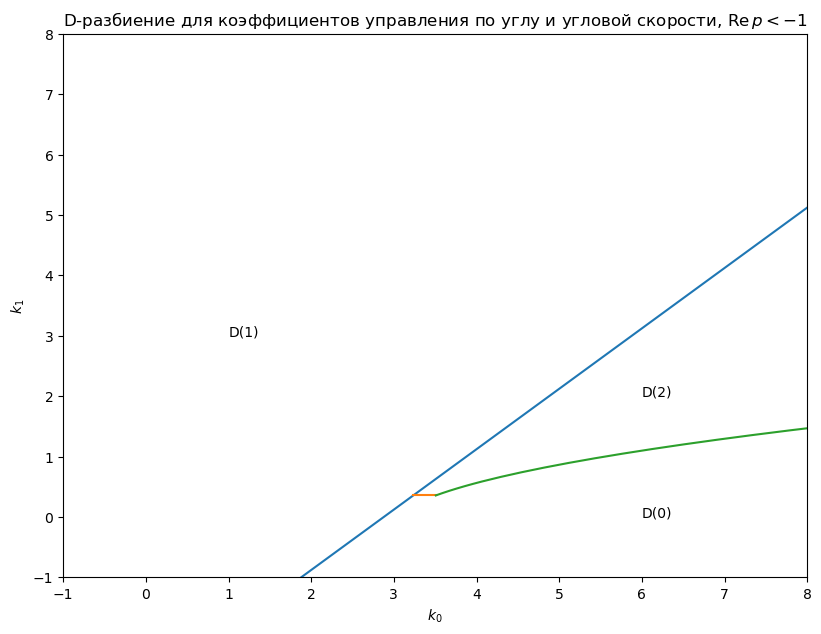

In [53]:
pc = -1.0
xi=1
k0lim = (-1., 8.)
k1lim = (-1., 8.)
k1_0 = array(k1lim)
k0_0 = -pc * k1_0 - (1. - ps2.alpha) * pc * pc - pc * ps2.lambd + (ps2.omega *
                                                                   ps2.omega)
k0_1 = array([pc * pc * (1. - ps2.alpha) + ps2.omega * ps2.omega, pc*pc*(1-ps2.alpha)*(xi*xi+1)+ps2.omega*ps2.omega])
k1_1 = full((2,), -ps2.lambd - 2. * pc * (1. - ps2.alpha))

k1_13 = np.linspace(-2*pc*(1-ps2.alpha)-ps2.lambd, k1lim[1], 200)
k0_13 = (k1_13+ps2.lambd)*(k1_13+ps2.lambd)*(xi*xi+1) / (4*(1-ps2.alpha)) + ps2.omega*ps2.omega



plot(k0_0, k1_0)
plot(k0_1, k1_1)
plot(k0_13, k1_13)

xlim(k0lim)
ylim(k1lim)
xlabel(r'$k_0$')
ylabel(r'$k_1$')
text(1., 3., 'D(1)')
text(6., 2., 'D(2)')
text(6., 0., 'D(0)')
title(r'D-разбиение для коэффициентов управления по углу и угловой ' +
      r'скорости, $\mathrm{Re}\, p < -1$');

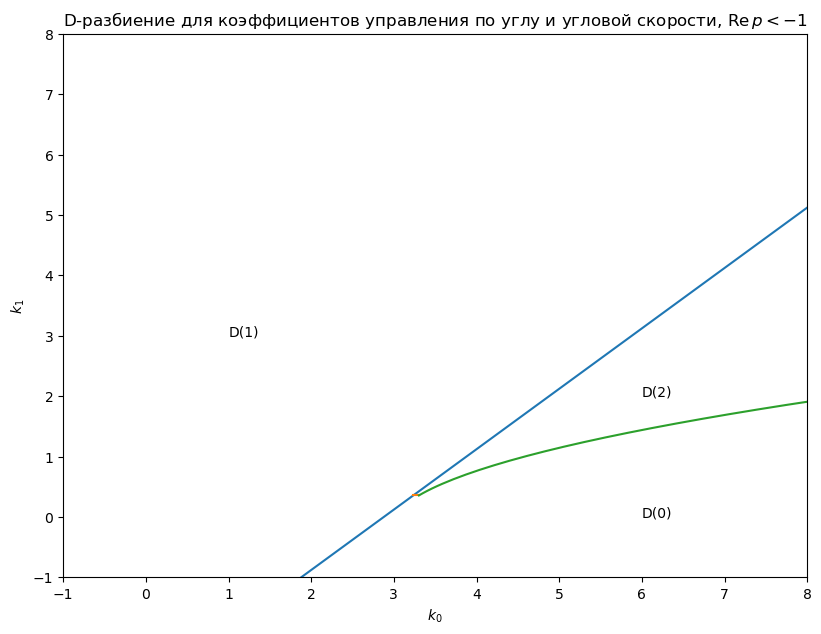

In [55]:
pc = -1.0
xi=0.5
k0lim = (-1., 8.)
k1lim = (-1., 8.)
k1_0 = array(k1lim)
k0_0 = -pc * k1_0 - (1. - ps2.alpha) * pc * pc - pc * ps2.lambd + (ps2.omega *
                                                                   ps2.omega)
k0_1 = array([pc * pc * (1. - ps2.alpha) + ps2.omega * ps2.omega, pc*pc*(1-ps2.alpha)*(xi*xi+1)+ps2.omega*ps2.omega])
k1_1 = full((2,), -ps2.lambd - 2. * pc * (1. - ps2.alpha))

k1_13 = np.linspace(-2*pc*(1-ps2.alpha)-ps2.lambd, k1lim[1], 200)
k0_13 = (k1_13+ps2.lambd)*(k1_13+ps2.lambd)*(xi*xi+1) / (4*(1-ps2.alpha)) + ps2.omega*ps2.omega



plot(k0_0, k1_0)
plot(k0_1, k1_1)
plot(k0_13, k1_13)

xlim(k0lim)
ylim(k1lim)
xlabel(r'$k_0$')
ylabel(r'$k_1$')
text(1., 3., 'D(1)')
text(6., 2., 'D(2)')
text(6., 0., 'D(0)')
title(r'D-разбиение для коэффициентов управления по углу и угловой ' +
      r'скорости, $\mathrm{Re}\, p < -1$');

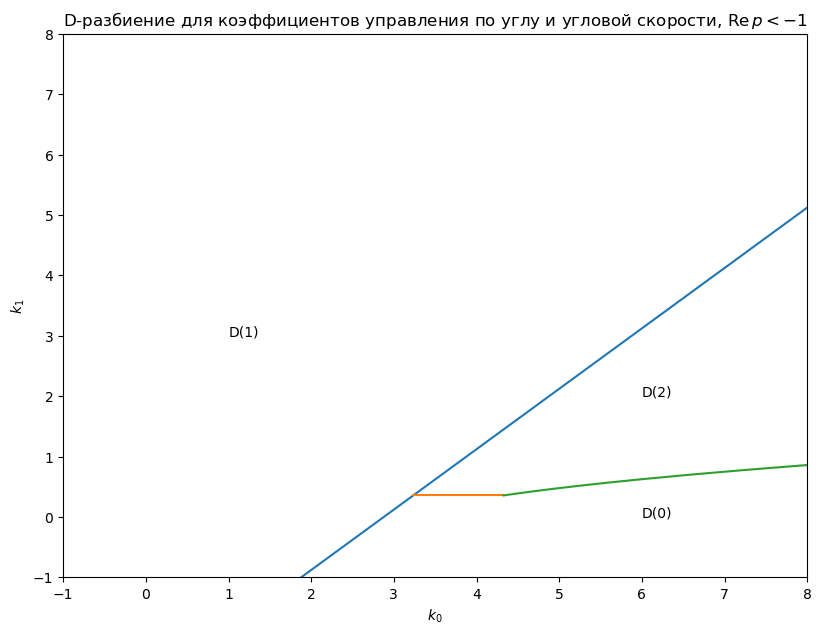

In [56]:
pc = -1.0
xi=2
k0lim = (-1., 8.)
k1lim = (-1., 8.)
k1_0 = array(k1lim)
k0_0 = -pc * k1_0 - (1. - ps2.alpha) * pc * pc - pc * ps2.lambd + (ps2.omega *
                                                                   ps2.omega)
k0_1 = array([pc * pc * (1. - ps2.alpha) + ps2.omega * ps2.omega, pc*pc*(1-ps2.alpha)*(xi*xi+1)+ps2.omega*ps2.omega])
k1_1 = full((2,), -ps2.lambd - 2. * pc * (1. - ps2.alpha))

k1_13 = np.linspace(-2*pc*(1-ps2.alpha)-ps2.lambd, k1lim[1], 200)
k0_13 = (k1_13+ps2.lambd)*(k1_13+ps2.lambd)*(xi*xi+1) / (4*(1-ps2.alpha)) + ps2.omega*ps2.omega



plot(k0_0, k1_0)
plot(k0_1, k1_1)
plot(k0_13, k1_13)

xlim(k0lim)
ylim(k1lim)
xlabel(r'$k_0$')
ylabel(r'$k_1$')
text(1., 3., 'D(1)')
text(6., 2., 'D(2)')
text(6., 0., 'D(0)')
title(r'D-разбиение для коэффициентов управления по углу и угловой ' +
      r'скорости, $\mathrm{Re}\, p < -1$');

# Задание 18. Характерное время установления
<a id="sec:pr18"></a>

Граница области, где действительные части обоих корней характеристического полинома меньше $p_c$, может быть построена и без применения D-разбиений. В самом деле эта граница представляет собой линию уровня максимального (по всем корням) значения действительной части корня характеристического уравнения. Такое построение в общем случае требует численного решения алгебраических уравнений (в отличие от полностью аналитического метода D-разбиений). Тем не менее на практически любых современных персональных компьютерах это решение производится сравнительно быстро, при этом не требуется проводить аналитических выкладок (которые могут оказаться достаточно громоздкими). Таким образом, совокупное время получения результата может оказаться меньше, чем при использовании D-разбиений. *Постройте такую контурную карту для характеристического полинома уравнения&nbsp;[$(9)$](student_part2.ipynb#mjx-eqn-eqodephireducedlinear) для управления по углу и угловой скорости так, чтобы линии уровня отвечали значениям $p_c = 0, -0.1, -0.2, \ldots, -1$.* Для того чтобы построить такие контурные карты с линиями уровня, можно использовать методы библиотеки Matplotlib, предназначенные для построения контурных карт, например `contour` и `contourf` (см. пример использования в&nbsp;[приложении&nbsp;3.5](files/supplementary_materials.html#sec:ex_contour)). Кроме контурных карт можно строить тепловые карты максимального значения действительной части корня. Верхнее положение устойчиво, если это максимальное значение отрицательно. При этом модуль величина, обратная к этому максимальному значению, имеет смысл характерного времени установления желаемого режима. Для построения тепловых карт можно использовать функцию `imshow` библиотеки Matplotlib для вывода растровых изображений вместе с функцией для отображения цветовой шкалы `colorbar` (см. пример использования в&nbsp;[приложении&nbsp;3.6](files/supplementary_materials.html#sec:ex_imshow)). Пример построения контурных и тепловых карт для максимальной действительной части квадратного трёхчлена приведён в&nbsp;[приложении&nbsp;5.6](files/supplementary_materials.html#sec:ex5). *Запишите аналитические условия, при которых процесс установления является квазигармоническим (с бесконечным числом переколебаний), и при которых&nbsp;— ангармоническим.* *На построенной карте отобразите линию, которая разделяет области параметров в квазигармоническим и ангармоническим установлением.*

###### Решение

Процесс установления квазигармонический при $k_1 > -\lambda$ и $k_0 > \Omega^2 + (\lambda + k_1)^2/4(1 - \alpha)$ и ангармонический&nbsp;— при $k_1 > -\lambda$ и $\Omega^2 < k_0 \leqslant \Omega^2 + (\lambda + k_1)^2/4(1 - \alpha)$.

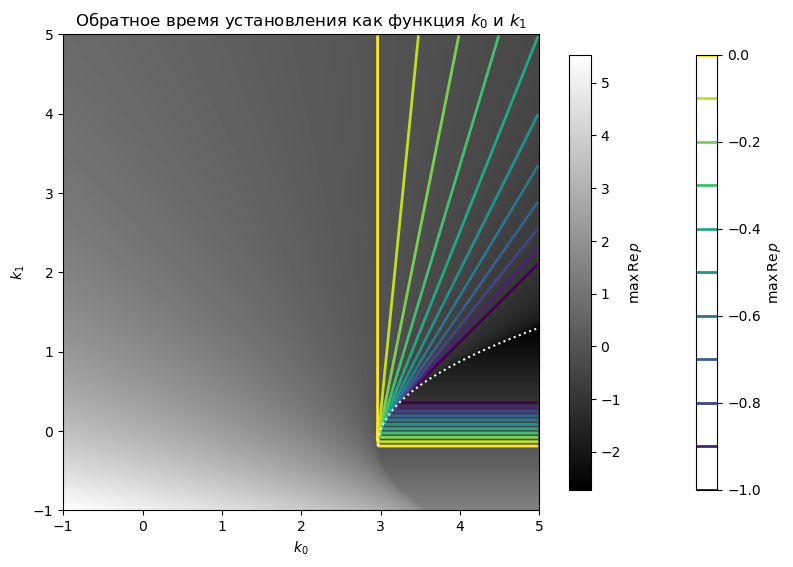

In [61]:
Pc = 0.1 * arange(-10, 1)
k0lim = (-1., 5.)
k1lim = (-1., 5.)
nk0 = 201
nk1 = 201

k0 = convolve(linspace(k0lim[0], k0lim[1], nk0), [0.5, 0.5], 'valid')
k1 = convolve(linspace(k1lim[0], k1lim[1], nk1), [0.5, 0.5], 'valid')
K0, K1 = meshgrid(k0, k1)

def find_maximal_re(k0_0, k1_0):
    return amax(real(roots([1. - ps2.alpha, ps2.lambd + k1_0,
                            -ps2.omega * ps2.omega + k0_0])))

vfind_maximal_re = vectorize(find_maximal_re)

maxrez = vfind_maximal_re(K0, K1)

# Построение кривой разделяющей квазигармонический и ангармонический режимы
k0h = linspace(ps2.omega * ps2.omega, k0lim[1], 201)
plot(k0h, sqrt(4. * (1. - ps2.alpha) * (k0h - ps2.omega * ps2.omega)) -
     ps2.lambd, ':w')

im = imshow(maxrez, interpolation='bilinear', origin='lower', cmap=cm.gray,
            extent=(k0lim[0], k0lim[1], k1lim[0], k1lim[1]))
contours = contour(maxrez, Pc, origin='lower', linewidths=2,
                   extent=(k0lim[0], k0lim[1], k1lim[0], k1lim[1]))

xlabel(r'$k_0$')
ylabel(r'$k_1$')
title(r'Обратное время установления как функция $k_0$ и $k_1$')

contours_bar = colorbar(contours, orientation='vertical', shrink=0.8,
                        label=r'$\max \,\mathrm{Re}\, p$')
im_bar = colorbar(im, orientation='vertical', shrink=0.8,
                  label=r'$\max \,\mathrm{Re}\, p$');

C:\Users\stud2020\AppData\Local\Temp/ipykernel_3860/205615256.py:40: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  im_bar = colorbar(im, orientation='vertical', shrink=0.8,


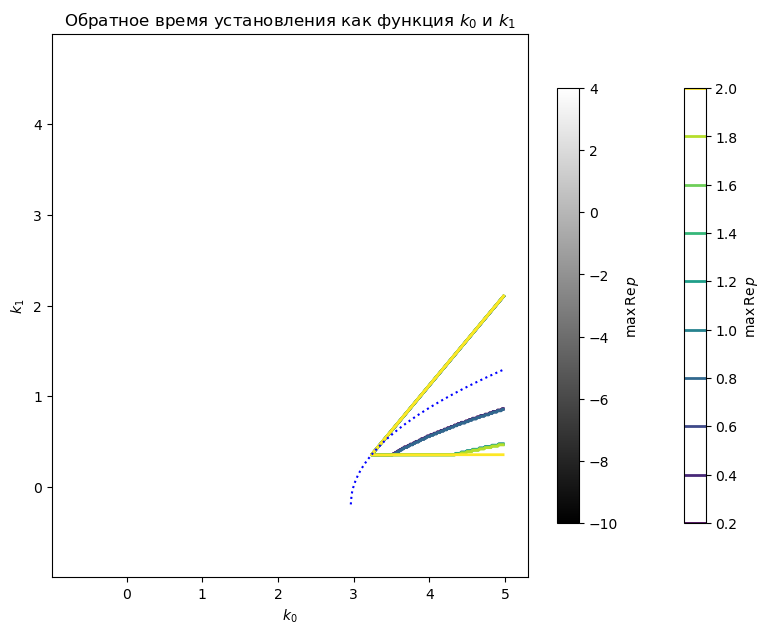

In [90]:
Xi = arange(1, 11)*0.2
k0lim = (-1., 5.)
k1lim = (-1., 5.)
nk0 = 401
nk1 = 401

k0 = convolve(linspace(k0lim[0], k0lim[1], nk0), [0.5, 0.5], 'valid')
k1 = convolve(linspace(k1lim[0], k1lim[1], nk1), [0.5, 0.5], 'valid')
K0, K1 = meshgrid(k0, k1)

def find_maximal_re(k0_0, k1_0):
    p = roots([1. - ps2.alpha, ps2.lambd + k1_0,
                            -ps2.omega * ps2.omega + k0_0])
    if amax(real(p)) > -1:
        return 10
    else:
        return amax(abs(imag(p))/abs(real(p)))


vfind_maximal_re = vectorize(find_maximal_re)

maxrez = vfind_maximal_re(K0, K1)

# Построение кривой разделяющей квазигармонический и ангармонический режимы
k0h = linspace(ps2.omega * ps2.omega, k0lim[1], 201)
plot(k0h, sqrt(4. * (1. - ps2.alpha) * (k0h - ps2.omega * ps2.omega)) -
     ps2.lambd, ':b')

#im = imshow(maxrez, interpolation='bilinear', origin='lower', cmap=cm.gray,
           #extent=(k0lim[0], k0lim[1], k1lim[0], k1lim[1]))
contours = contour(maxrez, Xi, origin='lower', linewidths=2,
                   extent=(k0lim[0], k0lim[1], k1lim[0], k1lim[1]))

xlabel(r'$k_0$')
ylabel(r'$k_1$')
title(r'Обратное время установления как функция $k_0$ и $k_1$')

contours_bar = colorbar(contours, orientation='vertical', shrink=0.8,
                        label=r'$\max \,\mathrm{Re}\, p$')
im_bar = colorbar(im, orientation='vertical', shrink=0.8,
                  label=r'$\max \,\mathrm{Re}\, p$');

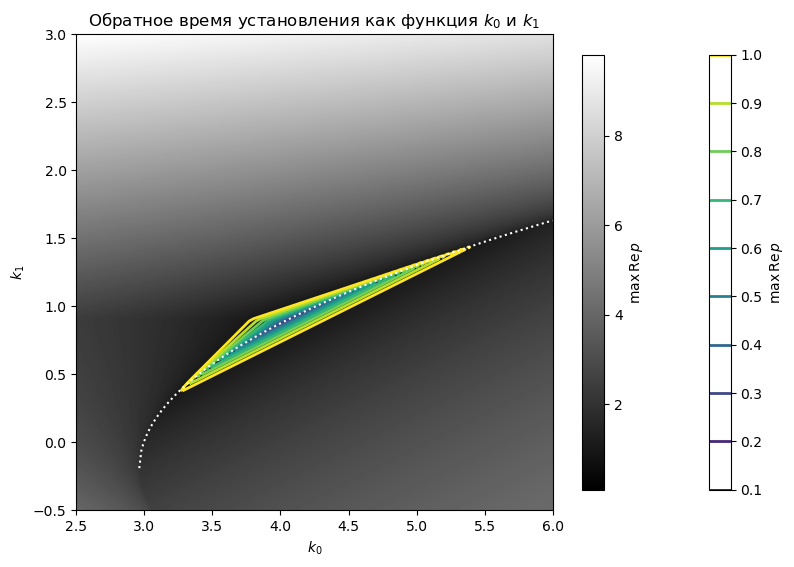

In [106]:
R = 0.1 * arange(1, 11)
k0lim = (2.5, 6.)
k1lim = (-0.5, 3.)
nk0 = 201
nk1 = 201

k0 = convolve(linspace(k0lim[0], k0lim[1], nk0), [0.5, 0.5], 'valid')
k1 = convolve(linspace(k1lim[0], k1lim[1], nk1), [0.5, 0.5], 'valid')
K0, K1 = meshgrid(k0, k1)

def find_maximal_re(k0_0, k1_0):
    p = roots([1. - ps2.alpha, ps2.lambd + k1_0,
                            -ps2.omega * ps2.omega + k0_0])
    return amax(abs(p+2))


vfind_maximal_re = vectorize(find_maximal_re)

maxrez = vfind_maximal_re(K0, K1)

# Построение кривой разделяющей квазигармонический и ангармонический режимы
k0h = linspace(ps2.omega * ps2.omega, k0lim[1], 201)
plot(k0h, sqrt(4. * (1. - ps2.alpha) * (k0h - ps2.omega * ps2.omega)) -
     ps2.lambd, ':w')

im = imshow(maxrez, interpolation='bilinear', origin='lower', cmap=cm.gray,
            extent=(k0lim[0], k0lim[1], k1lim[0], k1lim[1]))
contours = contour(maxrez, R, origin='lower', linewidths=2,
                   extent=(k0lim[0], k0lim[1], k1lim[0], k1lim[1]))

xlabel(r'$k_0$')
ylabel(r'$k_1$')
title(r'Обратное время установления как функция $k_0$ и $k_1$')

contours_bar = colorbar(contours, orientation='vertical', shrink=0.8,
                        label=r'$\max \,\mathrm{Re}\, p$')
im_bar = colorbar(im, orientation='vertical', shrink=0.8,
                  label=r'$\max \,\mathrm{Re}\, p$');

# Задание 19. Модальное управление
<a id="sec:pr19"></a>

Области, построенные в предыдущих [заданиях&nbsp;17](#sec:pr17) и [18](#sec:pr18), позволяют указать значения коэффциентов $k_0$ и $k_1$, необходимые для обеспечения желаемого времени установления. Подобный подход к синтезу систем управления называется модальным, когда ставятся требования к собственным числам замкнутой линейной системы дифференциальных уравнений, описывающей объект управления вместе с самим управлением (мода&nbsp;— какое-либо собственное подпространство линейного пространства функций или элемент такого подпространства). Система, описываемая уравнением&nbsp;[$(9)$](student_part2.ipynb#mjx-eqn-eqodephireducedlinear), принадлежит к классу так называемых вполне управляемых систем. Это, в частности, означает, что для любого заданного полинома второй степени с действительными коэффициентам найдутся такие значения $k_0$ и $k_1$, что для замкнутой системы этот полином будет являться характеристическим полиномом. То есть выбором $k_0$ и $k_1$ можно добиться того, что корни характеристического полинома совпадут с любыми двумя наперёд заданными действительными или комплексно сопряжёнными значениями $p_0$ и $p_1$. *Выразите $k_0$ и $k_1$ через $p_0$ и $p_1$.*

###### Решение

# Задание 20. Пример модального управления
<a id="sec:pr20"></a>

*С помощью результатов предыдущего [задания&nbsp;19](#sec:pr19) найдите значения $k_0$ и $k_1$, отвечающие $p_0 = p_1 = -1$.* Эта точка на плоскости $(k_0, k_1)$ является вершиной угла, ограничивающего соответствующую область на рисунках из&nbsp;[заданий&nbsp;17](#sec:pr17) и [18](#sec:pr18), и соответсвует временным зависимостям вида $(C_0 + C_1 t)e^{-t}$ для угла $\varphi$ вблизи верхнего положения равновесия, $C_{0, 1}$&nbsp;— постоянные во времени. *Рассчитайте и изобразите на графике временную зависимость угла отклонения, иллюстрирующую стабилизацию перевёрнутого маятника для найденных значений $k_0$ и $k_1$.*

###### Решение

In [7]:
# Определение значений k_0 и k_1
k0 = 0
k1 = 0
c = LinearStateControl(4, 1, [k0, k1, 0, 0])
print(c)

Linear state feedback control[[0 0 0 0]]


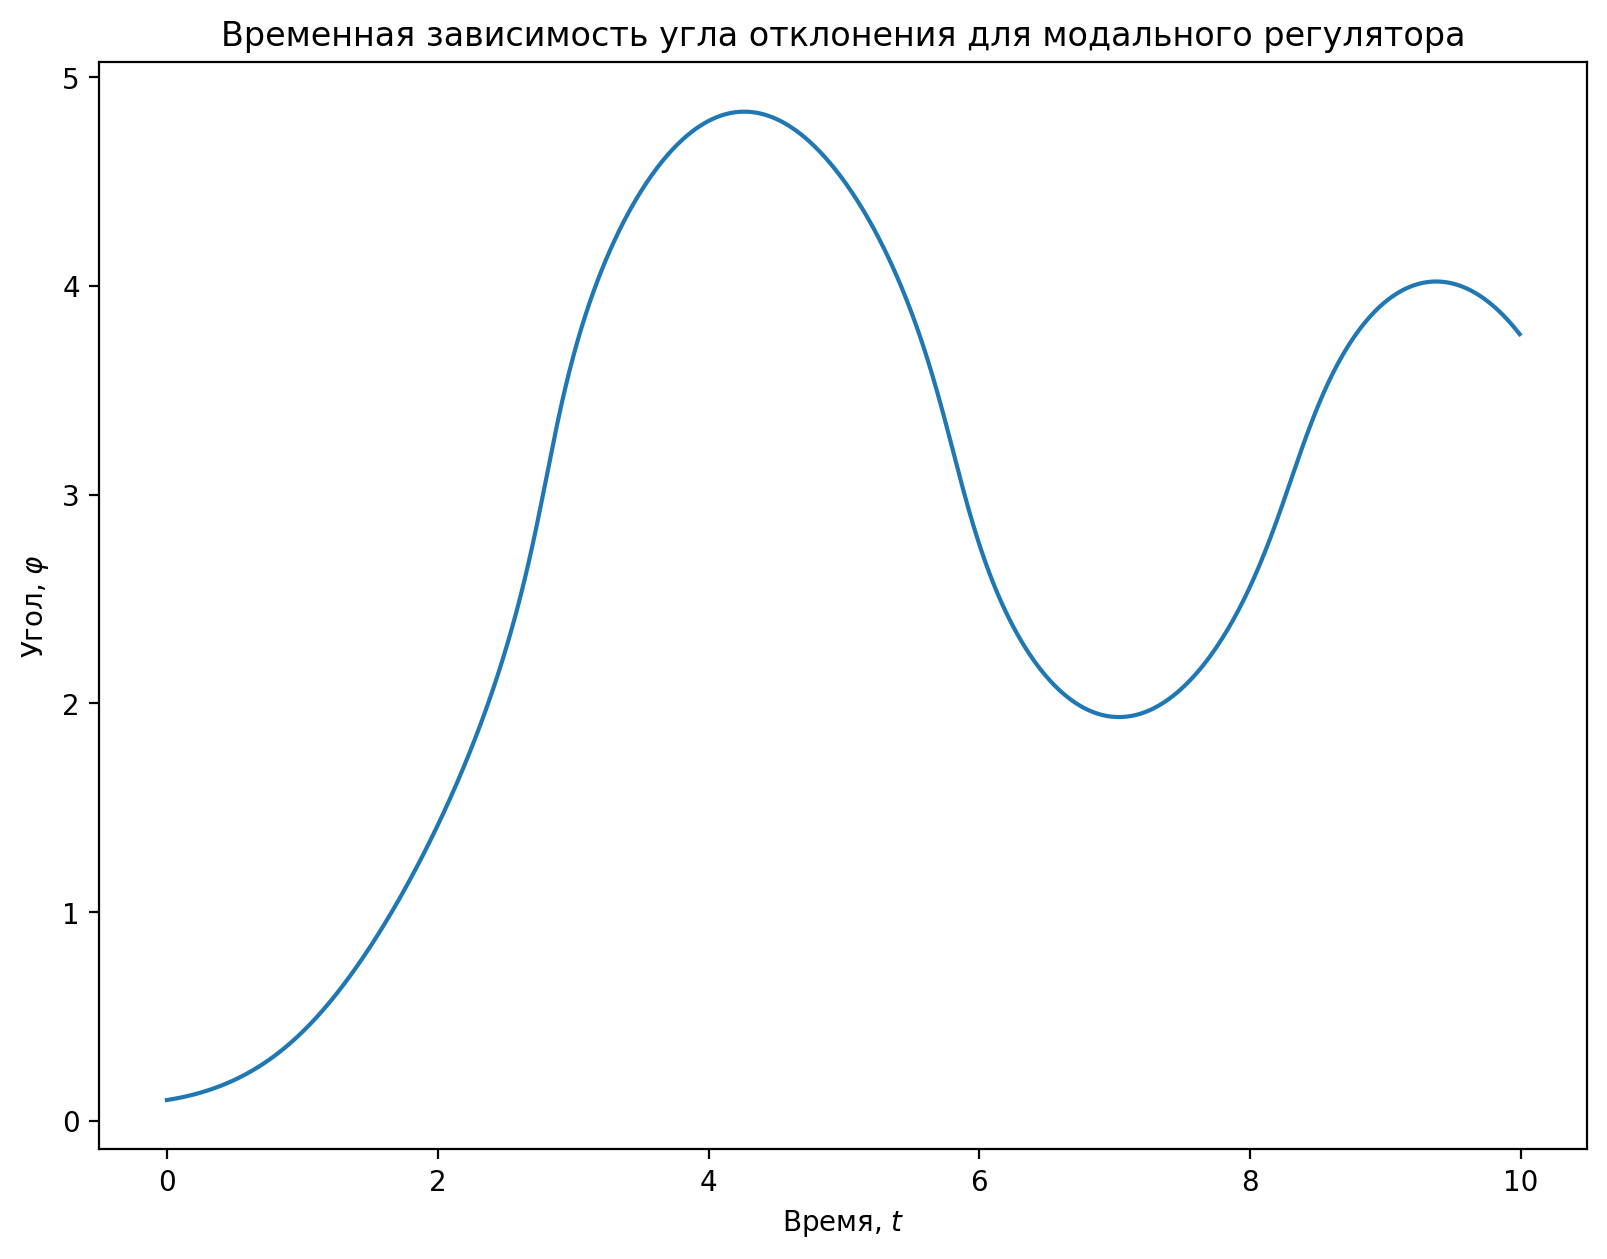

In [8]:
x0 = [0.1, 0.1, 0., 0.]
t, y = integrate(ps2, c, x0=x0, v0=empty(0), dt=0.01, T=10, N=1)
plot(t, y[:, 0])
xlabel(r'Время, $t$')
ylabel(r'Угол, $\varphi$')
title('Временная зависимость угла отклонения для модального регулятора');

# Задание 21. Время установления в нелинейном случае

Значения коэффициентов $k_0$ и $k_1$ в предыдущем [задании&nbsp;20](#sec:pr20) выбирались так, чтобы обеспечить время установления целевого режима регулирования около 1. Тем не менее из-за нелинейности системы такие времена установления достигаются только в некоторой относительно малой окрестности точки $(\varphi, \dot\varphi) = (0, 0)$. Для траекторий проходящих вблизи седловых точек время установления может быть сколь угодно большим, так как сколь угодно большим может быть время нахождения в окрестности седловой точки. *Убедитесь в этом, рассчитав временную зависимость угла отклонения для трёх различных начальных условий c $\varphi(0) = 0.1\tilde\varphi, 0.5\tilde\varphi, 0.9\tilde\varphi$ с $\dot\varphi(0) = 0$, где $\tilde\varphi$ — угол отклонения, соответствующий седловой точке.* *Для этих трёх случаев оцените время установления $\tau$, определённое как такое минимальное время, после которого значения $\left|\varphi(t)\right|$ оказываются меньше, чем $\left|\varphi(0)\right|/e$,
$$
\tau = \sup_{\left|\varphi(t)\right| > \left|\varphi(0)\right|/e} t.
$$*
*Почему даже для малых углов отклонения (при $\varphi(0) = 0.1\tilde\varphi$) время установления получилось в два раза больше, чем желаемое значение 1?*

###### Решение